## Bitcoin-Price-forecasting-Model

In [2]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [3]:
#let's read in our bitcoin data and parse the dates
df = pd.read_csv("C:\\Users\\moham\\Downloads\\projects\\Bitcoin-Price-Timeforecasting\\BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"]) #parse the date column and tell pandas column 1 is datetime

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


We've collected the historical price of Bitcoin for the past 8 years but there are only 2787 samples.

Typically deep learning models usually have large sample size ranging from 100 thousands to millions.

The Seasonality of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year

In [5]:
# only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866
...,...
2021-05-14,49764.13208
2021-05-15,50032.69314
2021-05-16,47885.62525


In [6]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Price of Bitcoin from 1 oct 2013 to 18 May 2021')

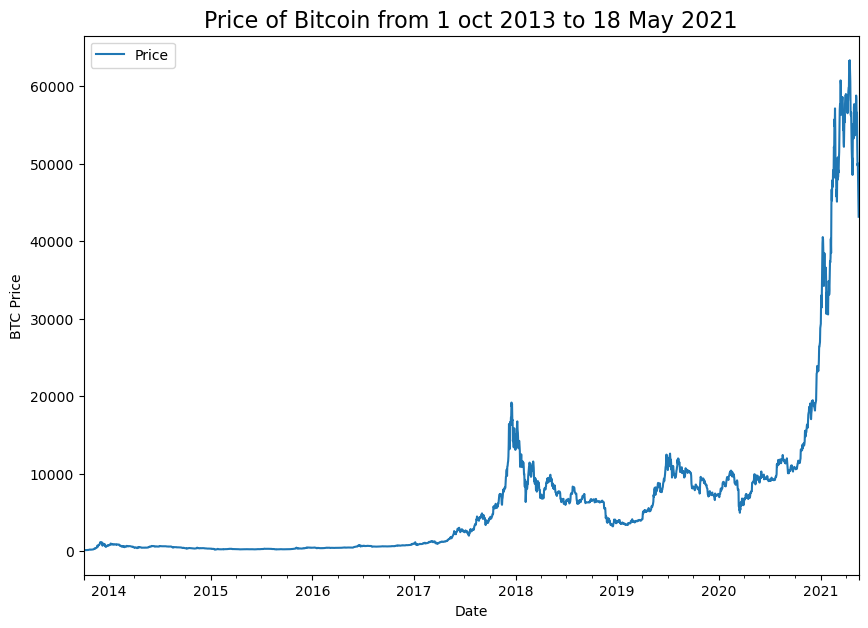

In [7]:
bitcoin_prices.plot(figsize = (10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 oct 2013 to 18 May 2021", fontsize = 16)

In [8]:
bitcoin_prices.describe()

,Price
count,2787.000000
mean,6529.845141
std,10887.847444
min,108.584830
25%,460.087500
50%,2780.182500
75%,8506.923720
max,63346.789040


Dataset doesn't have any missing values or other issues we can go ahead with model building.

#### Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10],  prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# create train and test splits the right way for the time series data
split_size = int(0.8*len(prices)) #80%train 20% test

#create train data splits (everything before the split)
x_train, y_train = timesteps[:split_size], prices[:split_size]

#create test data splits (everything  beyond the split)
x_test, y_test = timesteps[split_size:], prices[split_size:]

len(x_train), len(y_train), len(x_test), len(y_test)

(2229, 2229, 558, 558)

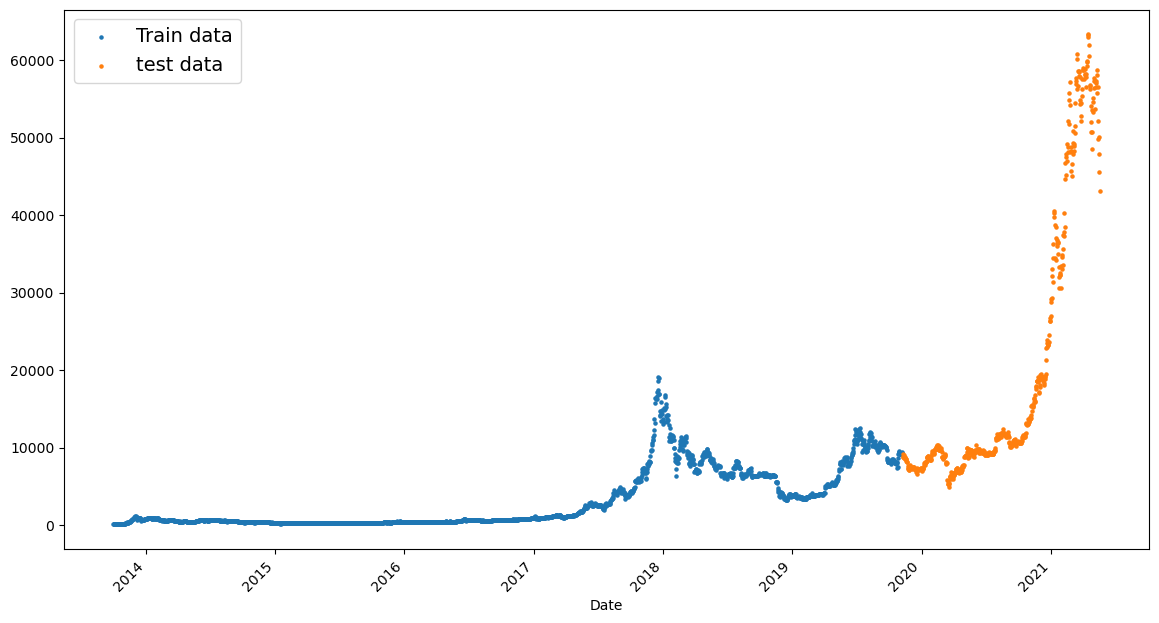

In [12]:
#plotting train test split
plt.figure(figsize = (14, 7))
plt.scatter(x_train, y_train, s = 5, label = "Train data")
plt.scatter(x_test, y_test, s = 5, label = "test data")
plt.xlabel("Date")
plt.xticks(rotation=45, ha="right")
plt.legend(fontsize = 14)
plt.show()

In [13]:
#create a function to plot time series data
def plot_time_series(timesteps, values, fomrat = ".", start = 0, end = None, label = None):
  """
  plots timesteps (a seires of points in time) against values (a series of valuesacross timesteps)

  Parameters
  -----------
  timesteps : array of timestep values
  value : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timestep)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values
  """

  #Plot the series
  plt.plot(timesteps[start:end], values[start:end])
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  plt.legend(fontsize = 14)
  plt.grid(True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


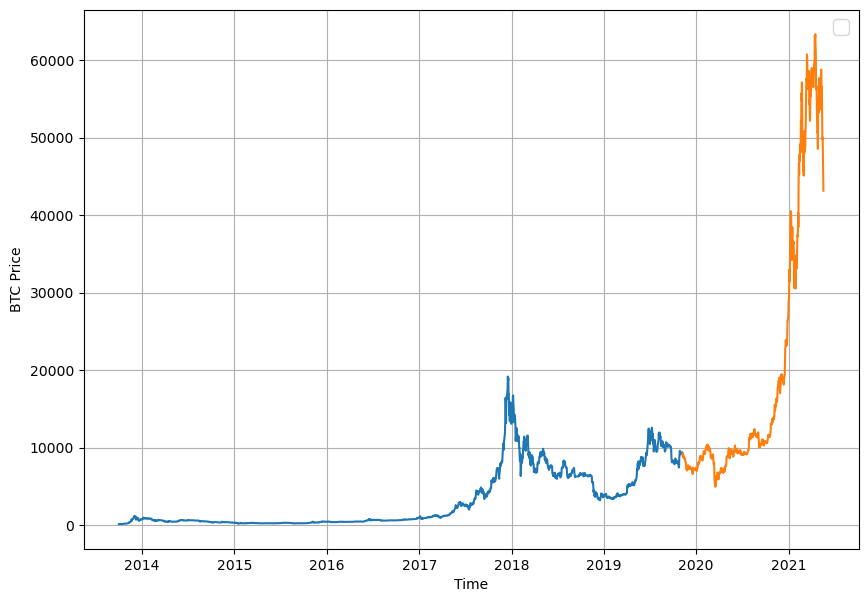

In [14]:
#Test our plotting function
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = x_train,
                 values = y_train,
                 label = "train data")

plot_time_series(timesteps = x_test,
                 values = y_test,
                 label = "test data")

### Model Building

#### Naive forecast

In [15]:
#create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.485821, 8794.358645, 8798.042055, 9081.186878, 8711.534339,
        8760.892718, 8749.520591, 8656.970922, 8500.643558, 8469.260899]),
 array([57107.12067, 58788.20968, 58102.19143, 55715.54665, 56573.55547,
        52147.82119, 49764.13208, 50032.69314, 47885.62525, 45604.61575]))

In [16]:
y_test[-10:]

array([58788.20968, 58102.19143, 55715.54665, 56573.55547, 52147.82119,
       49764.13208, 50032.69314, 47885.62525, 45604.61575, 43144.47129])

In [17]:
len(naive_forecast)

557

In [18]:
len(y_test)

558

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


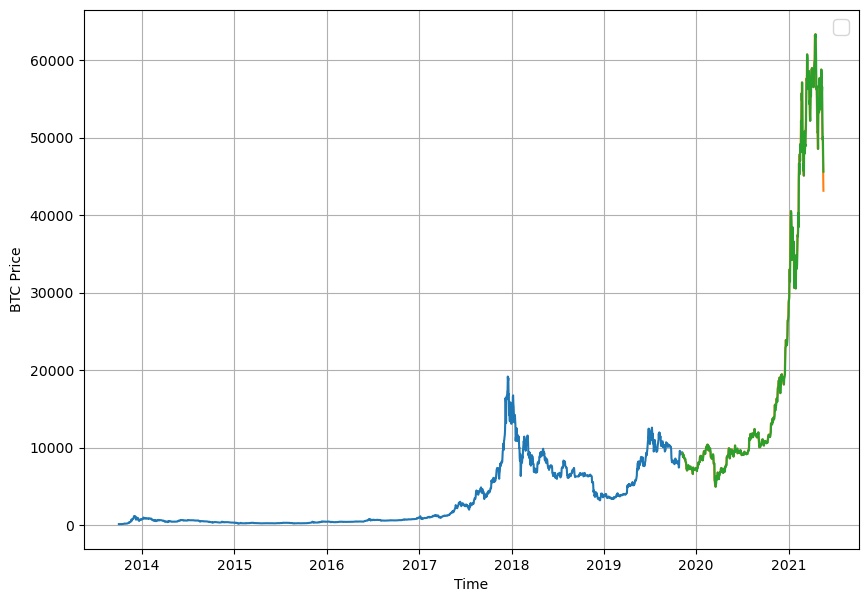

In [19]:
#plot naive forecast
plt.figure(figsize = (10, 7))
plt.legend()
plot_time_series(timesteps = x_train, values = y_train, label = "Train_data")
plot_time_series(timesteps = x_test, values = y_test, label = "Test_data")
plot_time_series(timesteps = x_test[1:], values = naive_forecast, fomrat=".", label = "Naive_Forecast")


#### Model Evaluation

In [20]:
import tensorflow as tf

In [21]:
# MASE Implementation
def mean_absolute_scaled_error(y_true, y_pred):
  #Implement MASE (assuming no seasonality of data)
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  #Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [22]:
mean_absolute_scaled_error(y_true = y_test[1:],
                           y_pred = naive_forecast).numpy()

0.9995699939172403

In [23]:
# create a function to take in model predictions and truth values and return evaluated results in a dictionary
def evaluate_preds(y_true, y_pred):
  #make sure float32 datatype (for metric calculation)\
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)


  #Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [24]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred = y_test[:-1])

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

#### Windowing our dataset

windowing our time series dataset to turn our data into supervised learning problem

windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]

In [25]:
#given
len(y_train)

2229

In [26]:
print(f"We want to use {prices[:7]}\nto predict {prices[7]}")

We want to use [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]
to predict 123.033


In [27]:
# Let's setup global variables for window and horizon size
HORIZON = 1 #predict the next one day
WINDOW_SIZE = 7 #use  the past week data for this

In [28]:
# create function to label windowed data
def get_labelled_window(x, horizon = HORIZON):
  """
  Creates labels for windowed dataset.
  E.g. if horizon = 1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output:[0, 1, 2, 3, 4, 5, 6]  [7]
  """
  return x[:, :-horizon], x[:, -horizon]

In [29]:
z = tf.range(8)+1

In [30]:
z[:-1], z[-1]

(<tf.Tensor: shape=(7,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7])>,
 <tf.Tensor: shape=(), dtype=int32, numpy=8>)

In [31]:
tf.expand_dims(tf.range(8)+1, axis = 0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]])>

In [32]:
# test out the window lebelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis = 0))
test_window, test_label


(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([8])>)

We've got a way to label our windowed data.
However , this only works in a small scale.
We need to find a way to do this across the entire time series.
We could do this with python for loops, however fo rlarge timee series data that would be quite slow.
To speed things up, we'll leverage NUmpy's array indexing.

In [33]:
'''Creating a function which will:
1. Createa windowstep of specific window size(e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use Numpy indexing to create a 2D array of multpile window steps.
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
]2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2) to index on a target series(e.g. the historical price of bitocin).
4. Uses our `get_labelled_window()` function we created to turn the window steps into a windows with a specific horizon'''
import numpy as np

# create function to view NumPy arrays as windows
def make_windows(x, window_size = WINDOW_SIZE, horizon = HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_szie with horizon size labels.
  """
  #1. create a window of specific wondow size
  window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)

  #2. create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis = 0).T

  print(f"window indexes:\n {window_indexes, window_indexes.shape}")


  #3. index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #4. get labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon = horizon)
  return windows, labels


In [34]:
np.expand_dims(np.arange(len(prices) - 7), axis = 0).T

array([[   0],
       [   1],
       [   2],
       ...,
       [2777],
       [2778],
       [2779]])

In [35]:
#get the windowed output

full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [36]:
full_windows[1]

array([125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
       123.033  ])

In [37]:
full_labels[1]

124.049

#### Turning windows into training and test sets

In [38]:
# make the train test splits
def make_train_test_splits(windows, labels, test_splits = 0.2):
  """
  Splits mmatching pairs into training and testing splits
  """
  split_size = int(len(windows) * (1 - test_splits)) # this will default to 80% train/20% test splits
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [39]:
# create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [40]:
train_windows[:10], train_labels[:10]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966],
        [120.65533, 121.795  , 123.033  , 124.049  , 125.96116, 125.27966,
         125.9275 ],
        [121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333],
        [123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199],
        [124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333],
        [125.96116, 125.27966, 125.9275 , 126.38333, 135.24199, 133.20333,
         142.76333]]),
 array([123.033  , 124.049  , 125.9611

In [41]:
# check to see if train labels are the same (before and after window split)
np.array_equal (np.squeeze(train_labels[:-HORIZON -1]),y_train[WINDOW_SIZE:])

True

In [42]:
y_train

array([ 123.65499 ,  125.455   ,  108.58483 , ..., 9369.628081,
       9326.599624, 9335.752402])

In [43]:
np.squeeze(train_labels[:-HORIZON ])

array([ 123.033   ,  124.049   ,  125.96116 , ..., 9326.599624,
       9335.752402, 9226.485821])

In [44]:
#Creating a model check point
import os

#create a function to implement a MOdelCheckpoint callback with a specific filename.
def create_model_checkpoint(model_name,  save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            save_best_only = True)

#### Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:

- A single dense layer with 128 units and ReLu activation.
- An output layer with linear activation(no activation)
- Adam optimisation and MAE loss function
- Batch size of 128 (previously we used 32, however our data is quite small, so we can upscale or batch size).
- we are going to run for 100 epochs.

In [45]:
import tensorflow as tf
from tensorflow.keras import layers

#set random seed
tf.random.set_seed(42)

#1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = "model_1_dense")

#compile the model
model_1.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer =tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

#fit the model
model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = 'model_1_dense')])


Epoch 1/100


 1/18 [>.............................] - ETA: 15s - loss: 2642.3943 - mae: 2642.3943 - mse: 14418537.0000

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 2s 46ms/step - loss: 1067.4495 - mae: 1067.4495 - mse: 4135986.2500 - val_loss: 2545.8154 - val_mae: 2545.8154 - val_mse: 15316317.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 382.7519 - mae: 382.7519 - mse: 696608.5000INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 22ms/step - loss: 314.3240 - mae: 314.3240 - mse: 411755.9375 - val_loss: 1448.2305 - val_mae: 1448.2305 - val_mse: 5244895.5000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 189.1719 - mae: 189.1719 - mse: 129776.1875INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 31ms/step - loss: 191.6729 - mae: 191.6729 - mse: 187627.9219 - val_loss: 1140.1329 - val_mae: 1140.1329 - val_mse: 3706092.5000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 230.2209 - mae: 230.2209 - mse: 237099.6406INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 178.1674 - mae: 178.1674 - mse: 168875.6562 - val_loss: 977.7651 - val_mae: 977.7651 - val_mse: 3148193.5000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 175.7090 - mae: 175.7090 - mse: 117603.4531INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 172.8284 - mae: 172.8284 - mse: 161869.3281 - val_loss: 973.5430 - val_mae: 973.5430 - val_mse: 3044424.2500
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 127.7298 - mae: 127.7298 - mse: 62397.2734INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 170.8971 - mae: 170.8971 - mse: 155889.7656 - val_loss: 941.1286 - val_mae: 941.1286 - val_mse: 3021773.0000
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 165.3164 - mae: 165.3164 - mse: 147667.5469 - val_loss: 944.7572 - val_mae: 944.7572 - val_mse: 2830172.5000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 140.3802 - mae: 140.3802 - mse: 79961.0469INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 28ms/step - loss: 161.3742 - mae: 161.3742 - mse: 142572.4531 - val_loss: 887.7850 - val_mae: 887.7849 - val_mse: 2687807.2500
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 160.6222 - mae: 160.6222 - mse: 140037.0469 - val_loss: 910.2856 - val_mae: 910.2856 - val_mse: 2607999.5000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 170.1800 - mae: 170.1800 - mse: 193704.4844INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 155.5951 - mae: 155.5951 - mse: 134057.7656 - val_loss: 850.3856 - val_mae: 850.3856 - val_mse: 2428172.5000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 159.7752 - mae: 159.7752 - mse: 117797.7969INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 28ms/step - loss: 151.5161 - mae: 151.5161 - mse: 125927.5000 - val_loss: 833.0927 - val_mae: 833.0927 - val_mse: 2318479.7500
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 147.4387 - mae: 147.4387 - mse: 120712.1016 - val_loss: 836.4085 - val_mae: 836.4085 - val_mse: 2250704.5000
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 147.2676 - mae: 147.2676 - mse: 120013.7969 - val_loss: 908.5771 - val_mae: 908.5771 - val_mse: 2397967.0000
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 156.1669 - mae: 156.1669 - mse: 108145.5156INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 146.1292 - mae: 146.1292 - mse: 114243.2969 - val_loss: 815.5789 - val_mae: 815.5789 - val_mse: 2108159.7500
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 144.4818 - mae: 144.4818 - mse: 77303.4375INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 140.6777 - mae: 140.6777 - mse: 110448.7188 - val_loss: 762.8053 - val_mae: 762.8053 - val_mse: 1954737.2500
Epoch 16/100
18/18 [==============================] - 0s 4ms/step - loss: 136.0678 - mae: 136.0678 - mse: 104196.3594 - val_loss: 762.9521 - val_mae: 762.9521 - val_mse: 1905426.3750
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 134.6713 - mae: 134.6713 - mse: 102985.4062 - val_loss: 787.2312 - val_mae: 787.2312 - val_mse: 1936835.5000
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 150.8194 - mae: 150.8194 - mse: 108760.7344INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 136.1429 - mae: 136.1429 - mse: 103928.8516 - val_loss: 752.0160 - val_mae: 752.0160 - val_mse: 1820638.7500
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 80.6431 - mae: 80.6431 - mse: 36560.4961INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 130.2648 - mae: 130.2648 - mse: 96273.7500 - val_loss: 743.4096 - val_mae: 743.4096 - val_mse: 1774591.1250
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 146.4640 - mae: 146.4640 - mse: 123521.0938INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 128.3573 - mae: 128.3573 - mse: 94996.0781 - val_loss: 720.6333 - val_mae: 720.6333 - val_mse: 1780044.0000
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 174.7177 - mae: 174.7177 - mse: 135255.6250INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 132.3432 - mae: 132.3432 - mse: 99572.9766 - val_loss: 698.1631 - val_mae: 698.1631 - val_mse: 1623278.1250
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 183.3220 - mae: 183.3220 - mse: 186499.6875INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 126.9055 - mae: 126.9055 - mse: 92170.6328 - val_loss: 694.0618 - val_mae: 694.0618 - val_mse: 1596259.6250
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 125.0014 - mae: 125.0014 - mse: 72086.9531INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 127.5395 - mae: 127.5395 - mse: 92719.5469 - val_loss: 685.6462 - val_mae: 685.6462 - val_mse: 1563616.7500
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 133.9890 - mae: 133.9890 - mse: 82413.1328INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 22ms/step - loss: 123.1021 - mae: 123.1021 - mse: 87916.3672 - val_loss: 668.6978 - val_mae: 668.6978 - val_mse: 1517374.6250
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 133.9788 - mae: 133.9788 - mse: 75513.7188INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 122.0671 - mae: 122.0671 - mse: 86120.3203 - val_loss: 658.3475 - val_mae: 658.3475 - val_mse: 1489540.6250
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 118.3099 - mae: 118.3099 - mse: 67614.4688INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 121.8120 - mae: 121.8120 - mse: 85587.2969 - val_loss: 652.1251 - val_mae: 652.1251 - val_mse: 1463581.3750
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 169.1287 - mae: 169.1287 - mse: 135766.0312INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 122.1997 - mae: 122.1997 - mse: 85160.6641 - val_loss: 646.4044 - val_mae: 646.4044 - val_mse: 1442333.8750
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 111.5729 - mae: 111.5729 - mse: 72030.1562INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 118.7871 - mae: 118.7871 - mse: 82770.0391 - val_loss: 642.3632 - val_mae: 642.3632 - val_mse: 1421653.6250
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 112.3455 - mae: 112.3455 - mse: 88884.8359INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 118.2277 - mae: 118.2277 - mse: 81907.5469 - val_loss: 635.6457 - val_mae: 635.6457 - val_mse: 1401794.7500
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 136.2628 - mae: 136.2628 - mse: 101212.8125INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 121.2740 - mae: 121.2740 - mse: 84094.1016 - val_loss: 631.3768 - val_mae: 631.3768 - val_mse: 1393389.8750
Epoch 31/100
18/18 [==============================] - 0s 3ms/step - loss: 118.7907 - mae: 118.7907 - mse: 80526.0703 - val_loss: 636.5570 - val_mae: 636.5570 - val_mse: 1387373.1250
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 112.2158 - mae: 112.2158 - mse: 78503.6641INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 116.3045 - mae: 116.3045 - mse: 81358.5000 - val_loss: 624.2731 - val_mae: 624.2731 - val_mse: 1366251.6250
Epoch 33/100
18/18 [==============================] - 0s 3ms/step - loss: 116.4876 - mae: 116.4876 - mse: 80198.1484 - val_loss: 641.4308 - val_mae: 641.4308 - val_mse: 1389137.1250
Epoch 34/100
18/18 [==============================] - 0s 3ms/step - loss: 116.7782 - mae: 116.7782 - mse: 80764.4219 - val_loss: 625.5999 - val_mae: 625.5999 - val_mse: 1373499.5000
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 107.1591 - mae: 107.1591 - mse: 62870.2656INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 114.0720 - mae: 114.0720 - mse: 78290.2656 - val_loss: 613.0436 - val_mae: 613.0436 - val_mse: 1328077.8750
Epoch 36/100
18/18 [==============================] - 0s 3ms/step - loss: 118.5767 - mae: 118.5767 - mse: 80575.1016 - val_loss: 634.6795 - val_mae: 634.6795 - val_mse: 1363106.2500
Epoch 37/100
18/18 [==============================] - 0s 3ms/step - loss: 118.2240 - mae: 118.2240 - mse: 81089.1328 - val_loss: 677.9925 - val_mae: 677.9925 - val_mse: 1511562.3750
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 122.4056 - mae: 122.4056 - mse: 80239.5156INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 116.9626 - mae: 116.9626 - mse: 80714.0547 - val_loss: 610.9150 - val_mae: 610.9150 - val_mse: 1304324.0000
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 132.0475 - mae: 132.0475 - mse: 111189.7812INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 33ms/step - loss: 112.9060 - mae: 112.9060 - mse: 77157.1016 - val_loss: 604.1440 - val_mae: 604.1440 - val_mse: 1293941.6250
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 112.0388 - mae: 112.0388 - mse: 75061.6875 - val_loss: 604.7435 - val_mae: 604.7435 - val_mse: 1300344.3750
Epoch 41/100
18/18 [==============================] - 0s 3ms/step - loss: 112.2302 - mae: 112.2302 - mse: 76567.6406 - val_loss: 643.6073 - val_mae: 643.6073 - val_mse: 1399462.2500
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 113.3446 - mae: 113.3446 - mse: 61806.9453INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 119.4479 - mae: 119.4479 - mse: 80682.2969 - val_loss: 600.0120 - val_mae: 600.0120 - val_mse: 1272294.0000
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 113.0702 - mae: 113.0702 - mse: 74673.0625 - val_loss: 614.3506 - val_mae: 614.3506 - val_mse: 1317947.5000
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 67.2589 - mae: 67.2589 - mse: 17011.8711INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 27ms/step - loss: 112.1159 - mae: 112.1159 - mse: 74842.2656 - val_loss: 595.6003 - val_mae: 595.6003 - val_mse: 1260968.6250
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 110.3679 - mae: 110.3679 - mse: 74413.8281 - val_loss: 606.6259 - val_mae: 606.6259 - val_mse: 1297490.1250
Epoch 46/100
18/18 [==============================] - 0s 3ms/step - loss: 111.1562 - mae: 111.1562 - mse: 73955.5625 - val_loss: 596.4412 - val_mae: 596.4412 - val_mse: 1255754.3750
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 110.9562 - mae: 110.9562 - mse: 74737.1562 - val_loss: 638.3041 - val_mae: 638.3041 - val_mse: 1338024.7500
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 110.4306 - mae: 110.4306 - mse: 74246.9297 - val_loss: 608.3501 - val_mae: 608.3501 - val_mse: 1272917.3750
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 111.6040 - mae: 111.6040 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 28ms/step - loss: 115.9801 - mae: 115.9801 - mse: 76304.1562 - val_loss: 591.3893 - val_mae: 591.3893 - val_mse: 1250465.3750
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 87.3780 - mae: 87.3780 - mse: 47360.0156INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 26ms/step - loss: 110.0798 - mae: 110.0798 - mse: 72861.3359 - val_loss: 588.0261 - val_mae: 588.0261 - val_mse: 1233777.0000
Epoch 52/100
18/18 [==============================] - 0s 3ms/step - loss: 112.7806 - mae: 112.7806 - mse: 75974.5938 - val_loss: 594.8572 - val_mae: 594.8572 - val_mse: 1256434.5000
Epoch 53/100
18/18 [==============================] - 0s 3ms/step - loss: 112.7977 - mae: 112.7977 - mse: 75259.7969 - val_loss: 659.0772 - val_mae: 659.0772 - val_mse: 1379926.1250
Epoch 54/100
18/18 [==============================] - 0s 3ms/step - loss: 115.1263 - mae: 115.1263 - mse: 74921.8516 - val_loss: 598.9584 - val_mae: 598.9584 - val_mse: 1246386.8750
Epoch 55/100
18/18 [==============================] - 0s 3ms/step - loss: 111.8761 - mae: 111.8761 - mse: 74861.0391 - val_loss: 588.8094 - val_mae: 588.8094 - val_mse: 1229101.1250
Epoch 56/100
18/18 [==============================] - 0s 3ms/step - loss: 112.3102 - mae: 112.3102 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 108.2368 - mae: 108.2368 - mse: 71030.1641 - val_loss: 587.0939 - val_mae: 587.0939 - val_mse: 1226886.7500
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 92.6787 - mae: 92.6787 - mse: 84252.2266INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 25ms/step - loss: 109.0205 - mae: 109.0205 - mse: 71992.2031 - val_loss: 586.5225 - val_mae: 586.5225 - val_mse: 1216291.1250
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 109.2133 - mae: 109.2133 - mse: 71396.7266 - val_loss: 619.2396 - val_mae: 619.2396 - val_mse: 1279379.6250
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 136.2109 - mae: 136.2109 - mse: 170989.4375INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 109.4410 - mae: 109.4410 - mse: 71852.1328 - val_loss: 578.5436 - val_mae: 578.5436 - val_mse: 1204414.3750
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 115.7247 - mae: 115.7247 - mse: 79711.3125INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 107.5004 - mae: 107.5004 - mse: 70726.9375 - val_loss: 574.2807 - val_mae: 574.2807 - val_mse: 1192748.6250
Epoch 67/100
18/18 [==============================] - 0s 3ms/step - loss: 107.7214 - mae: 107.7214 - mse: 70034.1797 - val_loss: 723.0340 - val_mae: 723.0340 - val_mse: 1583344.0000
Epoch 68/100
18/18 [==============================] - 0s 3ms/step - loss: 116.9067 - mae: 116.9067 - mse: 71704.4062 - val_loss: 731.9845 - val_mae: 731.9845 - val_mse: 1610977.6250
Epoch 69/100
18/18 [==============================] - 0s 3ms/step - loss: 122.5427 - mae: 122.5427 - mse: 80417.0078 - val_loss: 609.4131 - val_mae: 609.4131 - val_mse: 1270600.7500
Epoch 70/100
18/18 [==============================] - 0s 3ms/step - loss: 124.5123 - mae: 124.5123 - mse: 82194.2109 - val_loss: 575.6705 - val_mae: 575.6705 - val_mse: 1199203.6250
Epoch 71/100
18/18 [==============================] - 0s 3ms/step - loss: 111.7722 - mae: 111.7722 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 22ms/step - loss: 109.7215 - mae: 109.7215 - mse: 71244.3906 - val_loss: 574.0745 - val_mae: 574.0745 - val_mse: 1187824.8750
Epoch 73/100
18/18 [==============================] - 0s 3ms/step - loss: 107.4349 - mae: 107.4349 - mse: 69956.5859 - val_loss: 574.9726 - val_mae: 574.9726 - val_mse: 1193037.1250
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 163.2080 - mae: 163.2080 - mse: 167529.0625INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 108.3159 - mae: 108.3159 - mse: 71088.3750 - val_loss: 572.6722 - val_mae: 572.6722 - val_mse: 1186430.5000
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 107.2563 - mae: 107.2563 - mse: 69903.7188 - val_loss: 574.4901 - val_mae: 574.4901 - val_mse: 1186110.6250
Epoch 76/100
18/18 [==============================] - 0s 3ms/step - loss: 108.3621 - mae: 108.3621 - mse: 70721.2109 - val_loss: 579.1271 - val_mae: 579.1271 - val_mse: 1199750.0000
Epoch 77/100
18/18 [==============================] - 0s 3ms/step - loss: 106.8228 - mae: 106.8228 - mse: 69294.0938 - val_loss: 572.8754 - val_mae: 572.8754 - val_mse: 1184989.1250
Epoch 78/100
18/18 [==============================] - 0s 3ms/step - loss: 108.0246 - mae: 108.0246 - mse: 69828.0391 - val_loss: 575.2925 - val_mae: 575.2925 - val_mse: 1193155.5000
Epoch 79/100
18/18 [==============================] - 0s 3ms/step - loss: 107.8078 - mae: 107.8078 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 23ms/step - loss: 114.1748 - mae: 114.1748 - mse: 75173.2891 - val_loss: 570.4168 - val_mae: 570.4168 - val_mse: 1177732.8750
Epoch 83/100
18/18 [==============================] - 0s 3ms/step - loss: 111.3571 - mae: 111.3571 - mse: 72012.1797 - val_loss: 682.5532 - val_mae: 682.5532 - val_mse: 1449943.5000
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 112.0527 - mae: 112.0527 - mse: 71526.1641 - val_loss: 581.0567 - val_mae: 581.0567 - val_mse: 1203537.8750
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 107.6413 - mae: 107.6413 - mse: 69736.6641 - val_loss: 610.0471 - val_mae: 610.0471 - val_mse: 1248413.5000
Epoch 86/100
18/18 [==============================] - 0s 3ms/step - loss: 108.2539 - mae: 108.2539 - mse: 69002.1875 - val_loss: 572.8188 - val_mae: 572.8188 - val_mse: 1176989.2500
Epoch 87/100
18/18 [==============================] - 0s 3ms/step - loss: 105.9326 - mae: 105.9326 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 22ms/step - loss: 107.6450 - mae: 107.6450 - mse: 68843.9531 - val_loss: 568.2553 - val_mae: 568.2553 - val_mse: 1170781.7500
Epoch 90/100
18/18 [==============================] - 0s 3ms/step - loss: 105.0346 - mae: 105.0346 - mse: 67039.1328 - val_loss: 596.3649 - val_mae: 596.3649 - val_mse: 1218401.1250
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 109.1372 - mae: 109.1372 - mse: 70328.5000 - val_loss: 608.9561 - val_mae: 608.9561 - val_mse: 1258416.1250
Epoch 92/100
18/18 [==============================] - 0s 3ms/step - loss: 107.6967 - mae: 107.6967 - mse: 69634.0469 - val_loss: 589.0606 - val_mae: 589.0606 - val_mse: 1216800.7500
Epoch 93/100
18/18 [==============================] - 0s 3ms/step - loss: 114.9120 - mae: 114.9120 - mse: 73383.1094 - val_loss: 652.0256 - val_mae: 652.0256 - val_mse: 1365863.8750
Epoch 94/100
18/18 [==============================] - 0s 3ms/step - loss: 110.3213 - mae: 110.3213 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 0s 24ms/step - loss: 107.2191 - mae: 107.2191 - mse: 69783.6250 - val_loss: 565.2578 - val_mae: 565.2578 - val_mse: 1157015.0000
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 116.6958 - mae: 116.6958 - mse: 72269.4922 - val_loss: 656.1933 - val_mae: 656.1933 - val_mse: 1344673.8750


In [46]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 656.1933 - mae: 656.1933 - mse: 1344673.7500


[656.1932983398438, 656.1932983398438, 1344673.75]

In [47]:
#load in the saved best performing model
model_1 = tf.keras.models.load_model("C:\\Users\\moham\\Downloads\\projects\\Bitcoin-Price-Timeforecasting\\model_experiments\\model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 452us/step - loss: 565.2578 - mae: 565.2578 - mse: 1157014.8750


[565.2578125, 565.2578125, 1157014.875]

In [118]:
#Making forecasts with a model (on the test dataset)
def make_preds(model, input_data):
  """
  Uses model to ake predictions on input data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast,axis=-1) # reutrn 1D array of predictions.

In [49]:
#make predictions using model_1.
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[-10:]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([56870.78 , 58842.367, 58344.33 , 56184.184, 56334.105, 52817.996,
        49926.477, 49922.914, 48259.242, 45927.703], dtype=float32)>)

In [50]:
test_labels[-10:], test_labels.shape

(array([58788.20968, 58102.19143, 55715.54665, 56573.55547, 52147.82119,
        49764.13208, 50032.69314, 47885.62525, 45604.61575, 43144.47129]),
 (556,))

In [51]:
#evaluate pred
model_1_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_1_preds)
model_1_results

{'mae': 565.25775,
 'mse': 1157015.0,
 'rmse': 1075.6464,
 'mape': 2.5284626,
 'mase': 0.9930013}

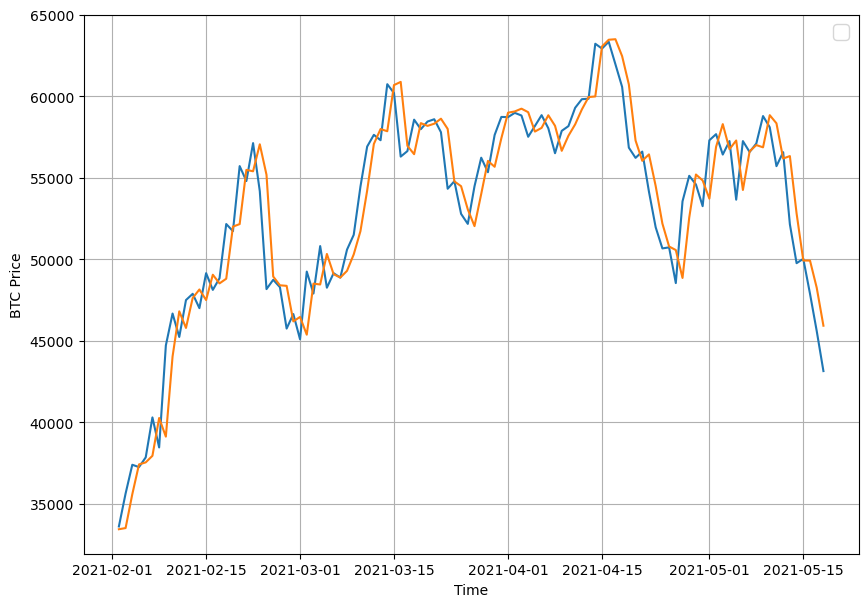

In [52]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize = (10, 7))
#Account for the test_window offset and index into test labels to ensure correct plot
plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = test_labels[:],
                 start = offset,
                 label = "test_data")

plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 label = "model_1_predictions")

#### Model 2: Dense(window = 30, horizon = 1)

In [53]:
HORIZON = 1
WINDOW_SIZE = 30

In [54]:
# make window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

window indexes:
 (array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2754, 2755, 2756, ..., 2782, 2783, 2784],
       [2755, 2756, 2757, ..., 2783, 2784, 2785],
       [2756, 2757, 2758, ..., 2784, 2785, 2786]]), (2757, 31))


(2757, 2757)

In [55]:
#make train and testig windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows,
                                                                                labels = full_labels,
                                                                                )
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [56]:
train_windows[:10], train_labels[:10]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [57]:
train_windows.shape

(2205, 30)

In [58]:
tf.random.set_seed(42)

#create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = "model_2_dense")

#compile the model
model_2.compile(loss = 'mae',
                optimizer = 'adam',
                metrics = ['mse'])

#fit the model
model_2.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


In [59]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 631.3301 - mse: 1318306.3750


[631.330078125, 1318306.375]

In [60]:
#load the best performing model
model_2 = tf.keras.models.load_model("C:\\Users\\moham\\Downloads\\projects\\Bitcoin-Price-Timeforecasting\\model_experiments\\model_2_dense")
model_2.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 1ms/step - loss: 602.5724 - mse: 1247827.7500


[602.5724487304688, 1247827.75]

In [61]:
#get model forecasts
model_2_preds = make_preds(model_2,
                           input_data = test_windows)

18/18 [==============================] - 0s 412us/step


In [62]:
#evaluate results for model 2
model_2_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_2_preds)
model_2_results

{'mae': 602.57245,
 'mse': 1247827.8,
 'rmse': 1117.0621,
 'mape': 2.718291,
 'mase': 1.0533024}

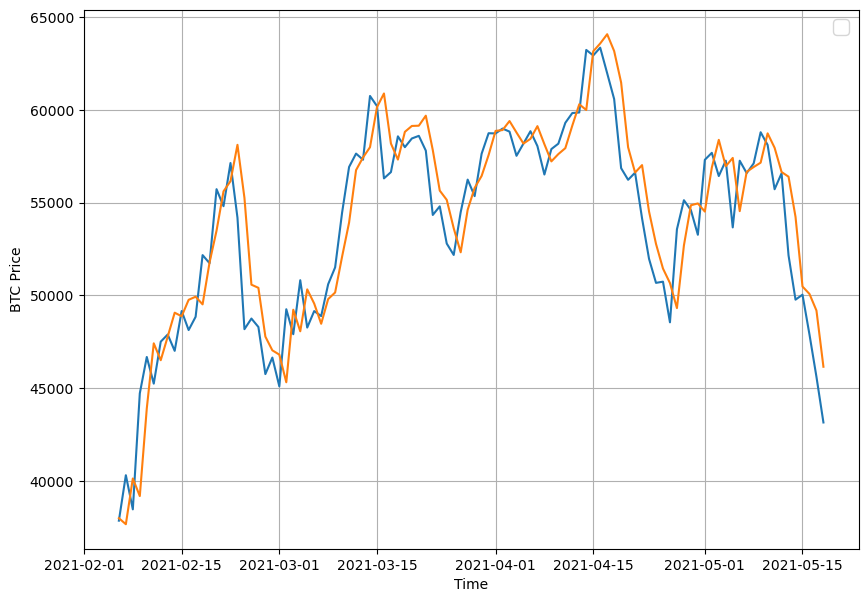

In [63]:
offset = 450
plt.figure(figsize = (10, 7))
#account for test_window offset when parsing
plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = test_labels[:],
                 start = offset,
                 label = "test_data")

plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = model_2_preds[:],
                 start = offset,
                 label = "model_2_preds")



#### Model 3: dense model( window = 30, horizon = 7)

In [64]:
HORIZON = 7
WINDOW_SIZE = 30

In [65]:
# make window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

window indexes:
 (array([[   0,    1,    2, ...,   34,   35,   36],
       [   1,    2,    3, ...,   35,   36,   37],
       [   2,    3,    4, ...,   36,   37,   38],
       ...,
       [2748, 2749, 2750, ..., 2782, 2783, 2784],
       [2749, 2750, 2751, ..., 2783, 2784, 2785],
       [2750, 2751, 2752, ..., 2784, 2785, 2786]]), (2751, 37))


(2751, 2751)

In [66]:
#make train and testig windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows,
                                                                                labels = full_labels,
                                                                                )
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [67]:
tf.random.set_seed(42)

#create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = "model_3_dense")

#compile the model
model_3.compile(loss = 'mae',
                optimizer = 'adam',
                metrics = ['mse'])

#fit the model
model_3.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


In [68]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 621.4256 - mse: 1298834.5000


[621.4255981445312, 1298834.5]

In [69]:
#load the best performing model
model_3= tf.keras.models.load_model("C:\\Users\\moham\\Downloads\\projects\\Bitcoin-Price-Timeforecasting\\model_experiments\\model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 517us/step - loss: 615.4700 - mse: 1299554.8750


[615.469970703125, 1299554.875]

In [70]:
#get model forecasts
model_3_preds = make_preds(model_3,
                           input_data = test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9159.461, 9385.069, 9372.314, 9322.641, 9246.037, 9336.675,
        9183.415],
       [8965.403, 9054.708, 8935.008, 9017.192, 9040.975, 9103.831,
        8915.068],
       [8754.845, 8766.955, 8649.133, 8745.303, 8797.25 , 8881.276,
        8640.336],
       [8833.405, 8865.761, 8978.725, 8921.838, 8967.283, 8964.304,
        8860.009],
       [8869.475, 8886.198, 8875.725, 8976.267, 8755.468, 8766.918,
        8802.2  ]], dtype=float32)>

In [71]:
model_3_preds_compatible = tf.reduce_mean(model_3_preds, axis = 1)

In [72]:
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8912.5625, 8854.2295, 8709.132 , 8588.484 , 8497.818 ],
      dtype=float32)>

In [73]:
#evaluate results for model 2
model_3_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_3_preds_compatible)
model_3_results


{'mae': 595.00323,
 'mse': 1245632.2,
 'rmse': 1116.079,
 'mape': 2.7476237,
 'mase': 1.0837349}

In [112]:
## make our evaluation function work fo rlarger horizons
def evaluate_preds(y_true, y_pred):
  #make sure float32 datatype (for metric calculation)\
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)


  #Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # account for different size metrics for longer horizons, we want to reduce metrics to a single value
  if mae.shape.ndims > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

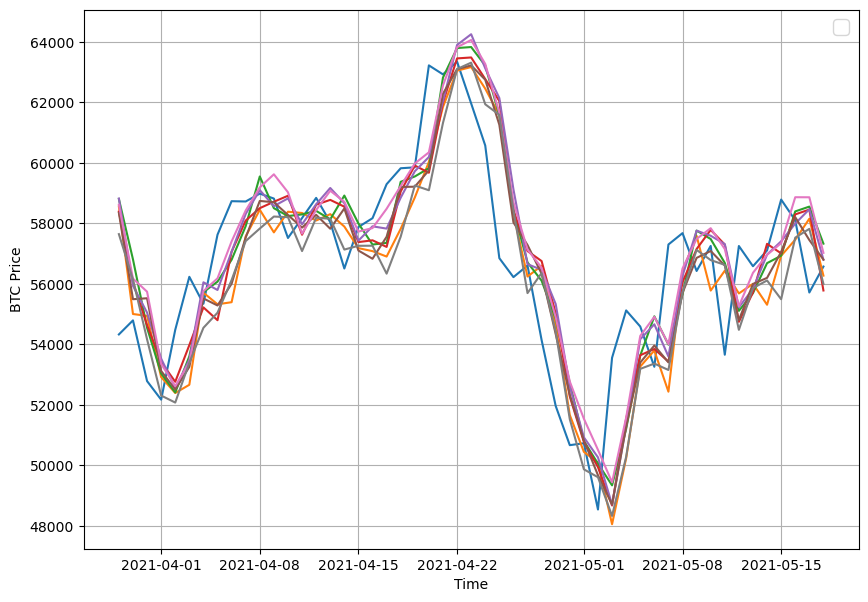

In [75]:
offset = 500
plt.figure(figsize = (10, 7))
#account for test_window offset when parsing
plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = test_labels[:],
                 start = offset,
                 label = "test_data")

plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = model_3_preds[:],
                 start = offset,
                 label = "model_3_preds")

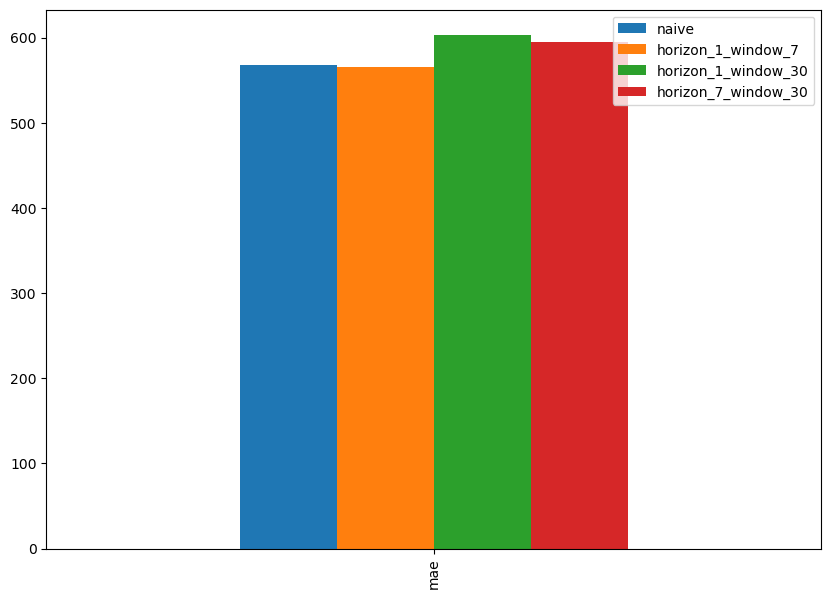

In [76]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index = ["mae"]).plot(figsize = (10, 7), kind = 'bar');

#### model 4: Conv1D model

In [77]:
HORIZON = 1
WINDOW_SIZE = 7

In [78]:
#create windowed dataset
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [79]:
#create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,
                                                                                full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [81]:
#To use the conv1d layer, we need to use an inpuit shape of: (batch_size, timesteps, input_dim) However our data isn't in that shape yet.
#check data input shapes
train_windows[0].shape

(7,)

In [82]:
#before we pass our data to Conv1D, let's ensure the data is in right shape
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [83]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))

In [84]:
#test out our lambda layer
print(f"Original shape : {x.shape}" ) #window size
print(f"Expanded shape : {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape : (7,)
Expanded shape : (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [85]:
tf.random.set_seed(42)

#create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = 0)),
    layers.Conv1D(filters = 32,
                  kernel_size = WINDOW_SIZE,

                  padding = 'causal',
                  activation = 'relu',
                  ),
    tf.keras.layers.Dense(units=32, activation='relu'),
    layers.Dense(HORIZON)
], name = "model_4_Conv1D")

#Compile model
model_4.compile(loss = "mae",
                optimizer = "adam",
                metrics = ["mae"])

#fit the model
model_4.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 12s - loss: 3006.2231 - mae: 3006.2231INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 54ms/step - loss: 2796.5522 - mae: 2796.5522 - val_loss: 16627.7891 - val_mae: 16627.7891
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 2804.9172 - mae: 2804.9172INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 40ms/step - loss: 2772.4819 - mae: 2772.4819 - val_loss: 16560.3984 - val_mae: 16560.3984
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 2792.0115 - mae: 2792.0115INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 40ms/step - loss: 2766.8950 - mae: 2766.8950 - val_loss: 16318.0322 - val_mae: 16318.0322
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 2760.2576 - mae: 2760.2576 - val_loss: 16467.9844 - val_mae: 16467.9844
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 2765.9138 - mae: 2765.9138 - val_loss: 16862.5605 - val_mae: 16862.5605
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 2762.3777 - mae: 2762.3777 - val_loss: 17546.5371 - val_mae: 17546.5371
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 2764.3738 - mae: 2764.3738 - val_loss: 17303.4219 - val_mae: 17303.4219
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 2763.6841 - mae: 2763.6841 - val_loss: 17121.3184 - val_mae: 17121.3184
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 2761.8157 - mae: 2761.8157 - val_loss: 16785.5742 - val_mae: 16785.5

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 49ms/step - loss: 2760.4062 - mae: 2760.4062 - val_loss: 16267.6689 - val_mae: 16267.6689
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 2757.8137 - mae: 2757.8137 - val_loss: 16927.6074 - val_mae: 16927.6074
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 2758.4006 - mae: 2758.4006 - val_loss: 17250.5273 - val_mae: 17250.5273
Epoch 22/100
18/18 [==============================] - 0s 4ms/step - loss: 2761.9788 - mae: 2761.9788 - val_loss: 17348.1914 - val_mae: 17348.1914
Epoch 23/100
18/18 [==============================] - 0s 4ms/step - loss: 2762.7449 - mae: 2762.7449 - val_loss: 16777.1133 - val_mae: 16777.1133
Epoch 24/100
18/18 [==============================] - 0s 4ms/step - loss: 2758.1665 - mae: 2758.1665 - val_loss: 16521.6582 - val_mae: 16521.6582
Epoch 25/100
18/18 [==============================] - 0s 4ms/step - loss: 2763.2302 - mae: 2763.2302 - val_loss: 16628.4258 - val_mae: 1

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 37ms/step - loss: 2762.9851 - mae: 2762.9851 - val_loss: 16174.0684 - val_mae: 16174.0684
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 2758.3442 - mae: 2758.3442 - val_loss: 16683.9141 - val_mae: 16683.9141
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 2760.1401 - mae: 2760.1401 - val_loss: 16787.8164 - val_mae: 16787.8164
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 2756.1643 - mae: 2756.1643 - val_loss: 16606.0840 - val_mae: 16606.0840
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 2760.9382 - mae: 2760.9382 - val_loss: 16768.7617 - val_mae: 16768.7617
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 2760.0205 - mae: 2760.0205 - val_loss: 16652.4707 - val_mae: 16652.4707
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 2754.9380 - mae: 2754.9380 - val_loss: 16900.7305 - val_mae: 1

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 39ms/step - loss: 2755.6484 - mae: 2755.6484 - val_loss: 15792.7373 - val_mae: 15792.7373
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 2757.4453 - mae: 2757.4453 - val_loss: 16158.0469 - val_mae: 16158.0469
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 2760.8784 - mae: 2760.8784 - val_loss: 16923.6582 - val_mae: 16923.6582
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 2757.3513 - mae: 2757.3513 - val_loss: 16297.5898 - val_mae: 16297.5898
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 2750.3540 - mae: 2750.3540 - val_loss: 16712.9102 - val_mae: 16712.9102
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 2751.6116 - mae: 2751.6116 - val_loss: 16817.1875 - val_mae: 16817.1875
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 2761.2373 - mae: 2761.2373 - val_loss: 16723.3301 - val_mae: 1

In [86]:
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (1, None, 7)              0         
                                                                 
 conv1d (Conv1D)             (1, None, 32)             1600      
                                                                 
 dense_6 (Dense)             (1, None, 32)             1056      
                                                                 
 dense_7 (Dense)             (1, None, 1)              33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
#Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 16396.9160 - mae: 16396.9160


[16396.916015625, 16396.916015625]

In [89]:
#reload the best performing model
model_4 = tf.keras.models.load_model("C:\\Users\\moham\\Downloads\\projects\\Bitcoin-Price-Timeforecasting\\model_experiments\\model_4_Conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 16005.0830 - mae: 16005.0830


[16005.0830078125, 16005.0830078125]

In [120]:
model_4_preds = make_preds(model_4,test_windows)
print(model_4_preds)

18/18 [==============================] - 0s 1ms/step
<tf.RaggedTensor [[1229.2786, 1558.0162, 909.7973, 1067.0756, 1437.8018, 1630.3453,
  2058.4673, 2082.2947, 2048.237, 1987.4851, 1975.2466, 2003.692, 1947.9327,
  1930.1101, 1934.4454, 1886.8983, 1840.9686, 1844.8053, 1852.3392,
  1808.7665, 1816.5902, 1801.5555, 1756.7812, 1687.17, 1683.0297, 1606.1642,
  1629.7368, 1616.6752, 1661.8397, 1668.9409, 1726.0103, 1708.0793]         ,
 [986.566, 1270.0067, 740.4917, 874.1113, 1154.2596, 1317.9908, 1673.1675,
  1668.2401, 1635.5992, 1609.9254, 1645.7479, 1658.3373, 1608.3193,
  1632.5231, 1612.951, 1579.1393, 1541.5409, 1630.8622, 1610.0233,
  1619.4076, 1645.2513, 1641.2819, 1623.7355, 1621.5385, 1621.2059,
  1612.2347, 1632.2767, 1664.0944, 1664.3708, 1686.3295, 1694.0826,
  1675.596]                                                               ,
 [1057.7615, 1425.1127, 822.7204, 962.0791, 1241.6444, 1486.6151, 1874.8729,
  1820.9252, 1867.5986, 1868.3163, 1850.1841, 1852.0642, 1938.61

#### model5: LSTM model

In [125]:
tf.random.set_seed(42)

#Let's build an LSTM model with the functional API
inputs = layers.Input(shape = WINDOW_SIZE)

x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)

x = layers.LSTM(128, return_sequences = True, activation = 'relu')(x)

x = layers.LSTM(128, activation = 'relu')(x)

x = layers.Dense(32, activation = 'relu')(x)

output = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs = inputs,
                         outputs = output,
                         name = "model_5_LSTM")

#compile
model_5.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

#fit
model_5.fit(train_windows,
            train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
 9/18 [==============>...............] - ETA: 0s - loss: 2940.1399 INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 5s 172ms/step - loss: 2790.0664 - val_loss: 13883.4141
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 1340.5457INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 186ms/step - loss: 994.0948 - val_loss: 2501.0618
Epoch 3/100
 9/18 [==============>...............] - ETA: 0s - loss: 271.1219INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 147ms/step - loss: 243.7948 - val_loss: 1033.9004
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 171.5289INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 149ms/step - loss: 171.5289 - val_loss: 936.2068
Epoch 5/100
10/18 [===============>..............] - ETA: 0s - loss: 170.3529INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 143ms/step - loss: 165.4945 - val_loss: 882.1268
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 162.9118 - val_loss: 891.7545
Epoch 7/100
11/18 [=================>............] - ETA: 0s - loss: 165.3654INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 149ms/step - loss: 156.9251 - val_loss: 871.3217
Epoch 8/100
10/18 [===============>..............] - ETA: 0s - loss: 150.0358INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 165ms/step - loss: 155.3330 - val_loss: 863.6330
Epoch 9/100
 9/18 [==============>...............] - ETA: 0s - loss: 157.4448INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 142ms/step - loss: 161.0150 - val_loss: 854.3936
Epoch 10/100
 9/18 [==============>...............] - ETA: 0s - loss: 152.2153INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 140ms/step - loss: 158.5360 - val_loss: 825.1851
Epoch 11/100
18/18 [==============================] - 0s 8ms/step - loss: 150.8459 - val_loss: 883.9131
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 149.3547 - val_loss: 873.2693
Epoch 13/100
18/18 [==============================] - 0s 8ms/step - loss: 148.6148 - val_loss: 921.1221
Epoch 14/100
18/18 [==============================] - 0s 7ms/step - loss: 146.8928 - val_loss: 880.9414
Epoch 15/100
18/18 [==============================] - 0s 7ms/step - loss: 145.6631 - val_loss: 834.0490
Epoch 16/100
18/18 [==============================] - 0s 8ms/step - loss: 141.8471 - val_loss: 852.8331
Epoch 17/100
18/18 [==============================] - 0s 8ms/step - loss: 139.6298 - val_loss: 888.9899
Epoch 18/100
18/18 [==============================] - 0s 8ms/step - loss: 141.7408 - val_loss: 847.5252
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 1

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 140ms/step - loss: 133.6413 - val_loss: 756.0925
Epoch 21/100
10/18 [===============>..............] - ETA: 0s - loss: 143.1981INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 140ms/step - loss: 136.8965 - val_loss: 721.5074
Epoch 22/100
18/18 [==============================] - 0s 7ms/step - loss: 133.4709 - val_loss: 769.5690
Epoch 23/100
18/18 [==============================] - 0s 8ms/step - loss: 137.1118 - val_loss: 789.7805
Epoch 24/100
12/18 [===================>..........] - ETA: 0s - loss: 131.6217INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 175ms/step - loss: 129.9760 - val_loss: 694.3135
Epoch 25/100
11/18 [=================>............] - ETA: 0s - loss: 134.2860INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 142ms/step - loss: 127.2035 - val_loss: 686.4974
Epoch 26/100
12/18 [===================>..........] - ETA: 0s - loss: 128.1643INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 139ms/step - loss: 128.9841 - val_loss: 679.0072
Epoch 27/100
18/18 [==============================] - 0s 7ms/step - loss: 128.7678 - val_loss: 682.4199
Epoch 28/100
14/18 [======================>.......] - ETA: 0s - loss: 122.0582INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 144ms/step - loss: 124.1768 - val_loss: 670.7614
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 122.8229 - val_loss: 673.0689
Epoch 30/100
11/18 [=================>............] - ETA: 0s - loss: 122.8136INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 138ms/step - loss: 128.5844 - val_loss: 653.3566
Epoch 31/100
 9/18 [==============>...............] - ETA: 0s - loss: 125.3129INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 169ms/step - loss: 121.4124 - val_loss: 650.0056
Epoch 32/100
18/18 [==============================] - 0s 6ms/step - loss: 121.0493 - val_loss: 663.9286
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 120.9423 - val_loss: 700.3755
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 127.2116INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 148ms/step - loss: 122.4637 - val_loss: 644.8860
Epoch 35/100
11/18 [=================>............] - ETA: 0s - loss: 123.4558INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 141ms/step - loss: 118.2080 - val_loss: 634.8040
Epoch 36/100
18/18 [==============================] - 0s 7ms/step - loss: 119.7905 - val_loss: 644.5367
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 119.9932 - val_loss: 653.2116
Epoch 38/100
18/18 [==============================] - 0s 7ms/step - loss: 119.7816 - val_loss: 696.0590
Epoch 39/100
11/18 [=================>............] - ETA: 0s - loss: 126.9393INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 141ms/step - loss: 121.9785 - val_loss: 627.2224
Epoch 40/100
10/18 [===============>..............] - ETA: 0s - loss: 116.8724INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 142ms/step - loss: 116.8381 - val_loss: 622.4563
Epoch 41/100
10/18 [===============>..............] - ETA: 0s - loss: 122.0965INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 166ms/step - loss: 115.5755 - val_loss: 614.2148
Epoch 42/100
18/18 [==============================] - 0s 7ms/step - loss: 126.0075 - val_loss: 626.2667
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 119.5647 - val_loss: 669.9777
Epoch 44/100
18/18 [==============================] - 0s 7ms/step - loss: 120.0040 - val_loss: 627.0536
Epoch 45/100
18/18 [==============================] - 0s 7ms/step - loss: 116.7522 - val_loss: 756.5447
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 119.2278 - val_loss: 694.6859
Epoch 47/100
13/18 [====================>.........] - ETA: 0s - loss: 114.8264INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 142ms/step - loss: 120.1025 - val_loss: 607.4815
Epoch 48/100
18/18 [==============================] - 0s 8ms/step - loss: 115.2132 - val_loss: 671.2298
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 121.0699 - val_loss: 635.7970
Epoch 50/100
18/18 [==============================] - 0s 8ms/step - loss: 126.0769 - val_loss: 622.2687
Epoch 51/100
 9/18 [==============>...............] - ETA: 0s - loss: 111.6793INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 147ms/step - loss: 114.5261 - val_loss: 599.1331
Epoch 52/100
10/18 [===============>..............] - ETA: 0s - loss: 118.6266INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 143ms/step - loss: 116.6458 - val_loss: 596.4220
Epoch 53/100
 9/18 [==============>...............] - ETA: 0s - loss: 113.2480INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 141ms/step - loss: 114.6821 - val_loss: 595.0778
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 113.9140 - val_loss: 630.1237
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 117.5645 - val_loss: 698.5482
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 121.1533 - val_loss: 875.7644
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 135.8505 - val_loss: 702.9233
Epoch 58/100
18/18 [==============================] - 0s 7ms/step - loss: 122.0884 - val_loss: 716.9055
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 120.9666 - val_loss: 669.5834
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 119.1301 - val_loss: 717.3719
Epoch 61/100
10/18 [===============>..............] - ETA: 0s - loss: 115.0427INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 142ms/step - loss: 121.2088 - val_loss: 591.9951
Epoch 62/100
18/18 [==============================] - 0s 8ms/step - loss: 113.0960 - val_loss: 592.5696
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 114.1441 - val_loss: 598.0701
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 111.6636 - val_loss: 599.6765
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 115.1208 - val_loss: 603.5010
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 111.8370 - val_loss: 595.6779
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 111.5435 - val_loss: 662.3499
Epoch 68/100
12/18 [===================>..........] - ETA: 0s - loss: 107.4932INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 171ms/step - loss: 109.4207 - val_loss: 583.0828
Epoch 69/100
18/18 [==============================] - 0s 8ms/step - loss: 111.0128 - val_loss: 626.1077
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 120.3047 - val_loss: 634.6268
Epoch 71/100
10/18 [===============>..............] - ETA: 0s - loss: 108.9443INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 146ms/step - loss: 110.9082 - val_loss: 582.1257
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 114.8312 - val_loss: 605.2203
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 117.1466 - val_loss: 596.4053
Epoch 74/100
18/18 [==============================] - 0s 8ms/step - loss: 115.5877 - val_loss: 598.2015
Epoch 75/100
18/18 [==============================] - 0s 8ms/step - loss: 113.0000 - val_loss: 585.0117
Epoch 76/100
18/18 [==============================] - 0s 7ms/step - loss: 114.2620 - val_loss: 582.6282
Epoch 77/100
12/18 [===================>..........] - ETA: 0s - loss: 113.6021INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 142ms/step - loss: 109.9421 - val_loss: 581.9948
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 111.7455 - val_loss: 582.3353
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 109.8603 - val_loss: 589.8334
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 111.2495 - val_loss: 591.8150
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 111.6475 - val_loss: 658.8079
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 118.1843 - val_loss: 843.8159
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 135.9984 - val_loss: 614.0529
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 117.2733 - val_loss: 599.0408
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 109.4478 - val_loss: 582.8848
Epoch 86/100
11/18 [=================>............] - ETA: 0s - loss: 103.6

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 140ms/step - loss: 108.5757 - val_loss: 579.2594
Epoch 87/100
18/18 [==============================] - 0s 9ms/step - loss: 110.1927 - val_loss: 626.9571
Epoch 88/100
18/18 [==============================] - 0s 7ms/step - loss: 110.0689 - val_loss: 601.4852
Epoch 89/100
 9/18 [==============>...............] - ETA: 0s - loss: 102.7302INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 141ms/step - loss: 109.4810 - val_loss: 573.4832
Epoch 90/100
18/18 [==============================] - 0s 8ms/step - loss: 108.0387 - val_loss: 578.3806
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 115.6968 - val_loss: 612.9616
Epoch 92/100
10/18 [===============>..............] - ETA: 0s - loss: 112.5250INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 167ms/step - loss: 115.4334 - val_loss: 573.3516
Epoch 93/100
10/18 [===============>..............] - ETA: 0s - loss: 119.5828INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 140ms/step - loss: 120.4864 - val_loss: 569.4359
Epoch 94/100
18/18 [==============================] - 0s 8ms/step - loss: 115.6457 - val_loss: 573.9847
Epoch 95/100
16/18 [=========================>....] - ETA: 0s - loss: 105.1035INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 152ms/step - loss: 107.3026 - val_loss: 567.2939
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 112.4107 - val_loss: 579.7502
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 109.7213 - val_loss: 572.2081
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 107.8130 - val_loss: 570.7009
Epoch 99/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4591 - val_loss: 568.9641
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 108.6539 - val_loss: 569.4341


In [126]:
model_5.summary()

Model: "model_5_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm (LSTM)                 (None, 1, 128)            69632     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 205377 (802.25 KB)
Trainable params: 205

In [127]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 569.4342


569.4342041015625

In [128]:
#load in the best model
model_5 = tf.keras.models.load_model("C:\\Users\\moham\\Downloads\\projects\\Bitcoin-Price-Timeforecasting\\model_experiments\\model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 567.2938


567.2938232421875

In [129]:
#make predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8883.608, 8822.48 , 9015.046, 8767.846, 8794.715], dtype=float32)>

In [130]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                   y_pred = model_5_preds)
model_5_results

{'mae': 567.29395,
 'mse': 1161460.9,
 'rmse': 1077.7109,
 'mape': 2.5594962,
 'mase': 0.99657834}

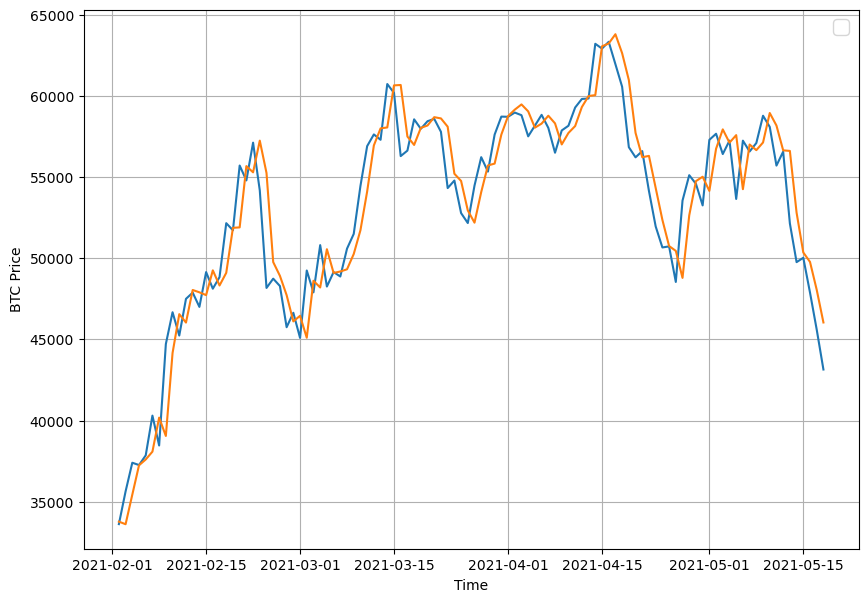

In [131]:
offset = 450
plt.figure(figsize = (10, 7))
#account for test_window offset when parsing
plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = test_labels[:],
                 start = offset,
                 label = "test_data")

plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = model_5_preds[:],
                 start = offset,
                 label = "model_5_preds")